In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
from sklearn.metrics import auc

In [286]:
mc="sample_size"
ms=[-1,100,1000,10000]
labels=["exact","100 samples","1000 samples","10000 samples"]
datafile="data_rand_backup.txt"

In [309]:
mc="sample_size"
ms=["normal","normalg","group"]
labels=["l1","l1 on group","group regularization"]
datafile="data_backup2.txt"

In [310]:
data=pd.read_csv(datafile,sep=";",names=("run","p","n",mc,"method","tp","tn","fp","fn"))

In [311]:
def compute_auroc(data):
    data=data.dropna()
    if (data.shape[0]<2):
        return 1
    data=data.sort_values(by="fpr")
    return(auc(data.fpr,data.tpr))
def compute_auprc(data):
    data=data.dropna()
    if (data.shape[0]<2):
        return 1
    data=data.sort_values(by="recall")
    return(auc(data.recall,data.percision))

In [312]:
fil= ((data.tp+data.fp)>0)
fil&= ((data.tn+data.fn)>0)
data=data[fil]
data.p=1-data.p
(~fil).sum()

87008

In [313]:
data["accuracy"]=(data.tp+data.tn)/(data.tp+data.tn+data.fp+data.fn)
data["percision"]=(data.tp)/(data.tp+data.fp)
data["recall"]=(data.tp)/(data.tp+data.fn)
data["f1"]=(2*data.tp)/(2*data.tp+data.fp+data.fn)
data["tpr"]=data.tp/(data.tp+data.fn)
data["fpr"]=data.fp/(data.fp+data.tn)

#data[["accuracy","percision","recall","f1","tpr","fpr"]]=data[["accuracy","percision","recall","f1","tpr","fpr"]].fillna(0)
data=data.dropna()

In [314]:
data[data.isna().any(axis=1)]

,run,p,n,sample_size,method,tp,tn,fp,fn,accuracy,percision,recall,f1,tpr,fpr


In [315]:
data

,run,p,n,sample_size,method,tp,tn,fp,fn,accuracy,percision,recall,f1,tpr,fpr
24,0,0.449229,15,normal,varadno,91,0,118,1,0.433333,0.435407,0.989130,0.604651,0.989130,1.000000
26,0,0.449229,15,normal,varadno,91,0,118,1,0.433333,0.435407,0.989130,0.604651,0.989130,1.000000
28,0,0.449229,15,normal,varadno,91,1,117,1,0.438095,0.437500,0.989130,0.606667,0.989130,0.991525
29,0,0.449229,15,normalg,varadno,142,0,66,2,0.676190,0.682692,0.986111,0.806818,0.986111,1.000000
30,0,0.449229,15,normal,varadno,91,1,117,1,0.438095,0.437500,0.989130,0.606667,0.989130,0.991525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214600,510,0.174364,20,group,fitch,8,246,4,122,0.668421,0.666667,0.061538,0.112676,0.061538,0.016000
214601,510,0.174364,20,group,fitch,8,246,4,122,0.668421,0.666667,0.061538,0.112676,0.061538,0.016000
214602,510,0.174364,20,group,fitch,8,246,4,122,0.668421,0.666667,0.061538,0.112676,0.061538,0.016000
214603,510,0.174364,20,group,fitch,6,246,4,124,0.663158,0.600000,0.046154,0.085714,0.046154,0.016000


In [316]:
data["p2"]=(data["p"]-0.05).round(1)+0.05

In [317]:
data[["p","p2"]].sample(20)

,p,p2
200330,0.239504,0.25
38832,0.834326,0.85
133374,0.706300,0.75
138571,0.458253,0.45
51291,0.349738,0.35
29436,0.113000,0.15
36309,0.280714,0.25
70952,0.455351,0.45
120172,0.445908,0.45
207361,0.826714,0.85


In [318]:
grouping_cols=["run","p2","n","method","sample_size"]

grouped=data.groupby(grouping_cols).agg(max_acc=('accuracy', 'max'), 
                              max_f1=('f1', 'max'))
grouped["auroc"]=data.groupby(grouping_cols).apply(compute_auroc)
grouped["auprc"]=data.groupby(grouping_cols).apply(compute_auprc)
grouped=grouped.reset_index()


In [319]:
grouped[grouped.p2>0.9]

,run,p2,n,method,sample_size,max_acc,max_f1,auroc,auprc
54,9,0.95,20,fitch,group,0.989474,0.994709,0.589947,0.965317
55,9,0.95,20,fitch,normal,0.955263,0.977120,0.645175,0.939880
56,9,0.95,20,fitch,normalg,0.989474,0.994709,0.666667,0.944530
57,9,0.95,20,varadno,group,0.989474,0.994709,0.328042,0.984792
58,9,0.95,20,varadno,normal,0.955263,0.977120,0.629207,0.966231
...,...,...,...,...,...,...,...,...,...
2666,497,0.95,20,fitch,normal,0.931579,0.964578,0.626423,0.945071
2667,497,0.95,20,fitch,normalg,0.984211,0.992042,0.617021,0.985224
2668,497,0.95,20,varadno,group,0.952632,0.975741,0.531915,0.953098
2669,497,0.95,20,varadno,normal,0.907895,0.951049,0.431662,0.904903


In [320]:
plt.rcParams.update({'font.size': 15})

In [321]:
def plot_all(var,maincolumn,mainset,labelset):
    fig, axs = plt.subplots(4, 2)
    fig.set_figwidth(16)
    fig.set_figheight(20)
    for method,j,label1 in zip(["fitch","varadno"],[0,1],["GGIM","GCLM"]):    
        for i ,label2 in zip( mainset,labelset):
            sample=grouped[(grouped[maincolumn]==i)&(grouped.method==method)]
            g=sample.groupby(var).agg(mean_max_acc=('max_acc', 'mean'), mean_max_f1=('max_f1', 'mean'),
                                       mean_auroc=("auroc","mean"),mean_auprc=('auprc',"mean"))
            g=g.reset_index()
            if (var=="p2"): xlabel="P"
            else: xlabel="n"   
            for metric,k in zip(['mean_max_acc','mean_max_f1','mean_auroc','mean_auprc'],[0,1,2,3]):
                axs[k,j].set_xlabel(xlabel)
                axs[k,j].set_ylabel(metric)
                g.plot(var,metric,label=label1+" "+label2,ax=axs[k,j],xlabel=xlabel,linewidth=3)

In [322]:
def plot_fv(var,maincolumn,mainset,labelset):
    fig, axs = plt.subplots(4, 1)
    fig.set_figwidth(6)
    fig.set_figheight(20)
    for method,j,label1 in zip(["fitch","varadno"],[0,1],["GGIM","GCLM"]):    
            sample=grouped[(grouped.method==method)]
            g=sample.groupby(var).agg(mean_max_acc=('max_acc', 'mean'), mean_max_f1=('max_f1', 'mean'),
                                       mean_auroc=("auroc","mean"),mean_auprc=('auprc',"mean"))
            g=g.reset_index()
            if (var=="p2"): xlabel="P"
            else: xlabel="n"   
            for metric,k in zip(['mean_max_acc','mean_max_f1','mean_auroc','mean_auprc'],[0,1,2,3]):
                axs[k].set_xlabel(xlabel)
                axs[k].set_ylabel(metric)
                g.plot(var,metric,label=label1,ax=axs[k,],xlabel=xlabel,linewidth=3)

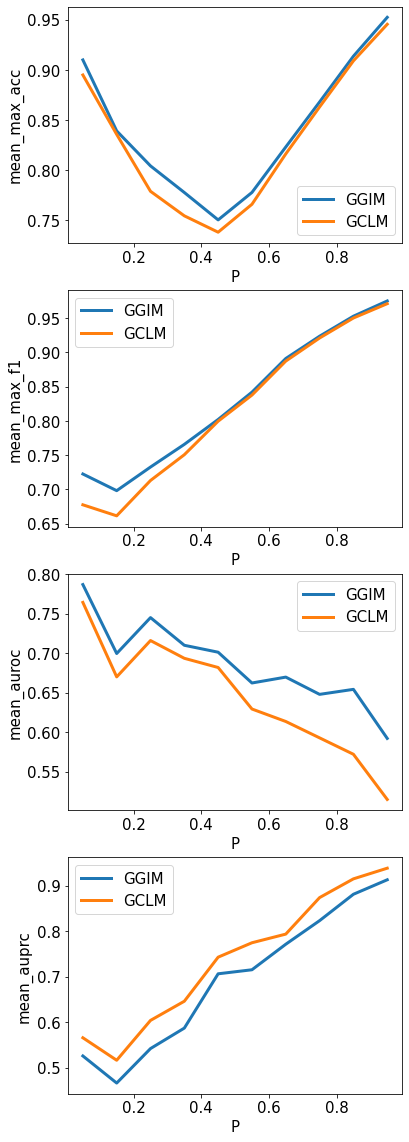

In [323]:
plot_fv("p2",mc,ms,labels)

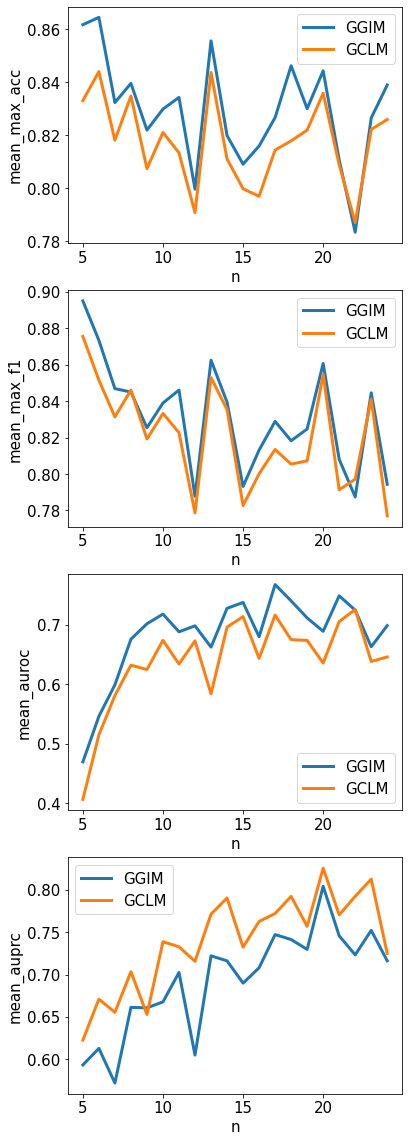

In [324]:
plot_fv("n",mc,ms,labels)

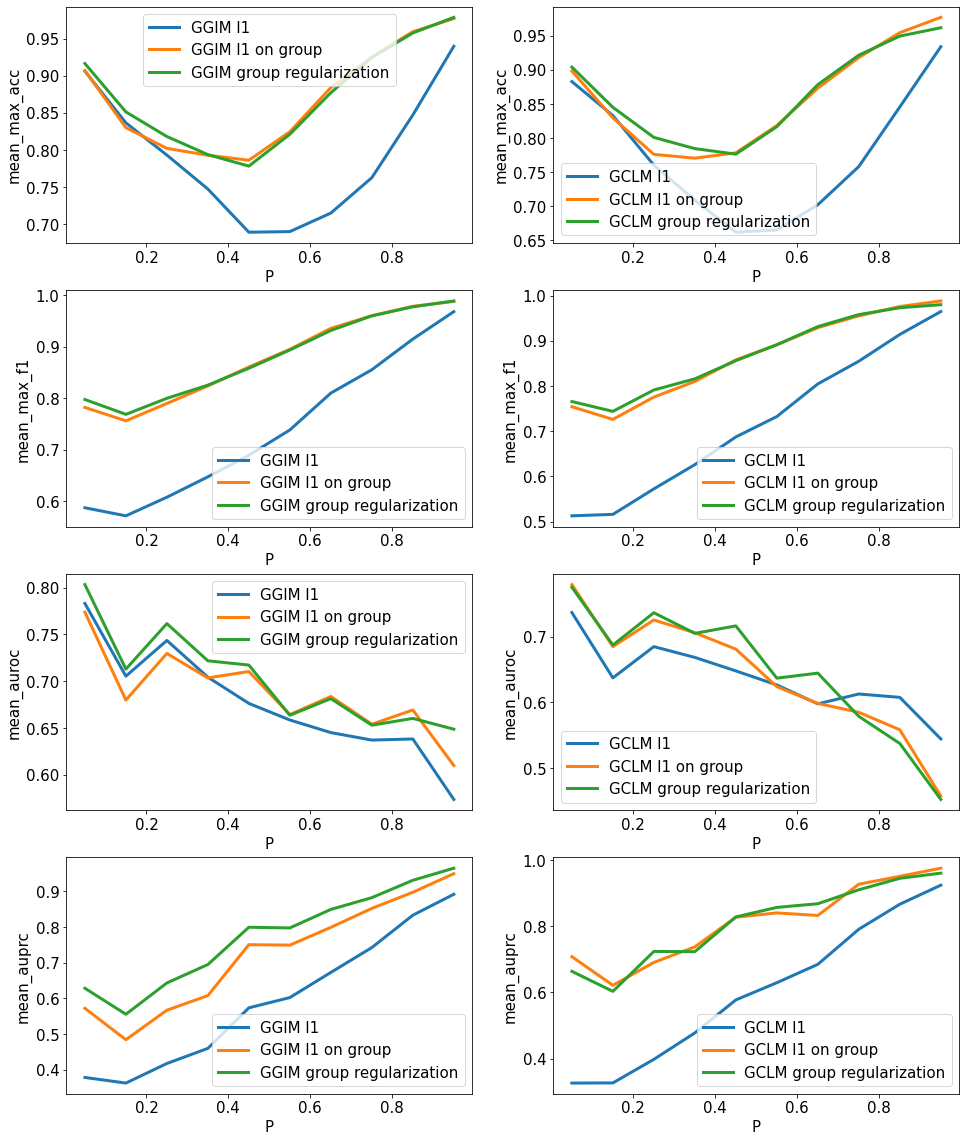

In [325]:
plot_all("p2",mc,ms,labels)

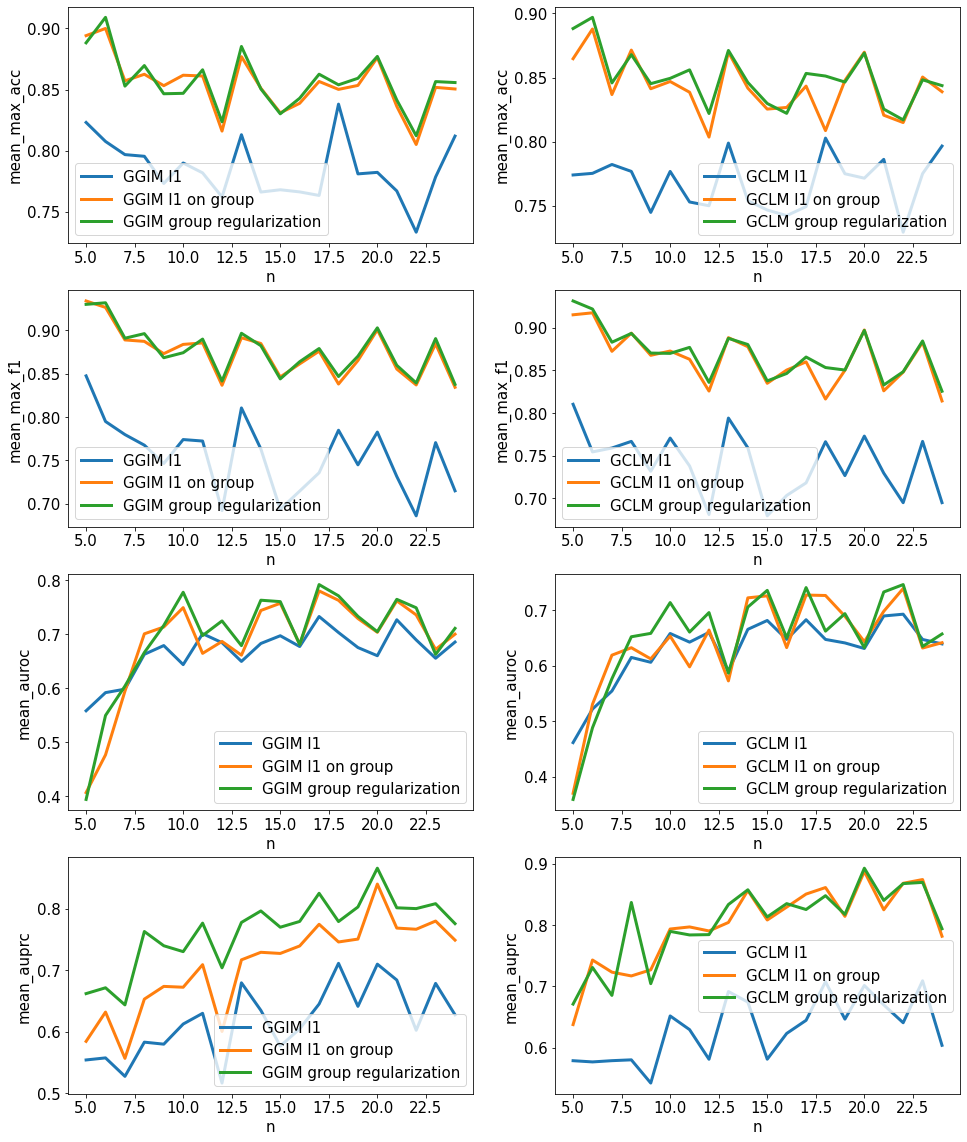

In [326]:
plot_all("n",mc,ms,labels)

In [86]:
grouped

,run,p,n,method,sample_size,max_acc,max_f1
0,0,0.550771,5,fitch,-1,0.900000,0.900000
1,0,0.550771,5,fitch,10,0.600000,0.620690
2,0,0.550771,5,fitch,100,0.800000,0.750000
3,0,0.550771,5,fitch,1000,0.800000,0.818182
4,0,0.550771,5,fitch,10000,0.900000,0.900000
...,...,...,...,...,...,...,...
3906,431,0.384001,13,fitch,-1,0.705128,0.783019
3907,431,0.384001,13,fitch,100,0.608974,0.747967
3908,431,0.384001,13,varadno,-1,0.685897,0.767773
3909,431,0.384001,13,varadno,100,0.602564,0.746988


In [80]:
grouped=data.groupby(["run","p","n","sample_size"])

In [37]:
data[(data.run==32)&(data.sample_size==-1)&(data.method=="fitch")]

,run,p,n,sample_size,method,tp,tn,fp,fn,accuracy,percision,recall,f1,tpr,fpr,p2
19220,32,0.939152,10,-1,fitch,6,62,22,0,0.755556,0.214286,1.000000,0.352941,1.000000,0.261905,0.95
19221,32,0.939152,10,-1,fitch,6,62,22,0,0.755556,0.214286,1.000000,0.352941,1.000000,0.261905,0.95
19222,32,0.939152,10,-1,fitch,6,62,22,0,0.755556,0.214286,1.000000,0.352941,1.000000,0.261905,0.95
19223,32,0.939152,10,-1,fitch,6,62,22,0,0.755556,0.214286,1.000000,0.352941,1.000000,0.261905,0.95
19224,32,0.939152,10,-1,fitch,6,62,22,0,0.755556,0.214286,1.000000,0.352941,1.000000,0.261905,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19284,32,0.939152,10,-1,fitch,1,83,1,5,0.933333,0.500000,0.166667,0.250000,0.166667,0.011905,0.95
19285,32,0.939152,10,-1,fitch,0,83,1,6,0.922222,0.000000,0.000000,NaN,0.000000,0.011905,0.95
19286,32,0.939152,10,-1,fitch,0,83,1,6,0.922222,0.000000,0.000000,NaN,0.000000,0.011905,0.95
19287,32,0.939152,10,-1,fitch,0,83,1,6,0.922222,0.000000,0.000000,NaN,0.000000,0.011905,0.95


0.22123015873015875
0.47599206349206347
0.22222222222222224


<AxesSubplot:xlabel='fpr'>

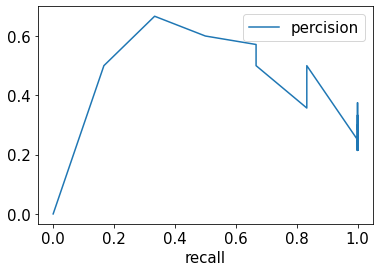

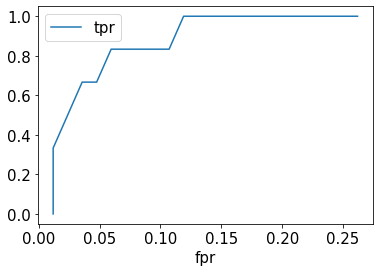

In [305]:
test=data[(data.run==32)&(data.sample_size==-1)&(data.method=="fitch")]
sample=test.dropna()

print(compute_auroc(sample))

sample=sample.sort_values(by="recall")
print(auc(sample.recall,sample.percision))
sample.plot("recall","percision")

sample=sample.sort_values(by="fpr")
print(auc(sample.fpr,sample.tpr))
sample.plot("fpr","tpr")

In [304]:
sample.groupby("recall").agg(percision=('percision', 'mean'))

,percision
recall,
0.000000,0.000000
0.166667,0.500000
0.333333,0.666667
0.500000,0.600000
0.666667,0.547619
0.833333,0.443452
1.000000,0.248512


In [289]:
grouped=data.groupby(["run","p2","n","method","sample_size"]).apply(compute_auroc)

In [290]:
grouped

run  p2    n   method   sample_size
0    0.55  5   fitch    -1             0.929293
                         10            0.409091
                         100           0.671717
                         1000          0.853535
                         10000         0.929293
                                         ...   
431  0.35  13  fitch    -1             0.702424
                         100           0.576122
               varadno  -1             0.714030
                         100           0.580645
                         1000          0.669141
Length: 3911, dtype: float64

In [27]:
grouped[grouped.p2==0.75]

,run,p2,n,method,sample_size,max_acc,max_f1,auroc,auprc
136,15,0.75,6,fitch,-1,0.733333,0.583333,0.711640,0.414803
137,15,0.75,6,fitch,10,0.533333,0.461538,0.359788,0.180377
138,15,0.75,6,fitch,100,0.700000,0.514286,0.595238,0.282060
139,15,0.75,6,fitch,1000,0.733333,0.551724,0.658730,0.393801
140,15,0.75,6,fitch,10000,0.733333,0.620690,0.730159,0.427728
...,...,...,...,...,...,...,...,...,...
4529,501,0.75,14,fitch,10000,0.774725,0.519084,0.712409,0.349617
4530,501,0.75,14,varadno,-1,0.774725,0.493333,0.684834,0.400807
4531,501,0.75,14,varadno,100,0.763736,0.410811,0.603731,0.346268
4532,501,0.75,14,varadno,1000,0.763736,0.473684,0.675912,0.369434


In [ ]:
data[(data.run==32)&()]